In [1]:
#Library Importing

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Data loading with Yfinance (Apple Stock Data)

stock_data = yf.download("AAPL", start="2021-01-01", end="2023-12-31")
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2021-01-04  126.544205  129.410004  133.610001  126.760002  133.520004   
2021-01-05  128.108780  131.009995  131.740005  128.429993  128.889999   
2021-01-06  123.796440  126.599998  131.050003  126.379997  127.720001   
2021-01-07  128.020782  130.919998  131.630005  127.860001  128.360001   
2021-01-08  129.125748  132.050003  132.630005  130.229996  132.429993   

Price          Volume  
Ticker           AAPL  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  


In [17]:
data = stock_data.reset_index()
data = data.drop(index=0)
data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [18]:
data

,Date,Adj Close,Close,High,Low,Open,Volume
1,2021-01-05,128.108780,131.009995,131.740005,128.429993,128.889999,97664900
2,2021-01-06,123.796440,126.599998,131.050003,126.379997,127.720001,155088000
3,2021-01-07,128.020782,130.919998,131.630005,127.860001,128.360001,109578200
4,2021-01-08,129.125748,132.050003,132.630005,130.229996,132.429993,105158200
5,2021-01-11,126.123726,128.979996,130.169998,128.500000,129.190002,100384500
...,...,...,...,...,...,...,...
748,2023-12-22,192.656189,193.600006,195.410004,192.970001,195.179993,37122800
749,2023-12-26,192.108841,193.050003,193.889999,192.830002,193.610001,28919300
750,2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
751,2023-12-28,192.636261,193.580002,194.660004,193.169998,194.139999,34049900


In [19]:
data.shape

(752, 7)

In [20]:
data.isnull().any()

,0
Date,False
Adj Close,False
Close,False
High,False
Low,False
Open,False
Volume,False


In [21]:
data.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [22]:
data.duplicated().sum()

0

In [23]:
data.drop(['Date'], axis=1).describe()

,Adj Close,Close,High,Low,Open,Volume
count,752.000000,752.000000,752.000000,752.000000,752.000000,7.520000e+02
mean,154.127342,156.118032,157.694522,154.377260,155.961862,7.917376e+07
std,20.168902,19.860474,19.816682,19.878101,19.838845,2.778176e+07
min,113.953232,116.360001,120.400002,116.209999,119.029999,2.404830e+07
25%,139.730652,141.977501,143.407497,139.487499,141.742496,5.848338e+07
50%,150.970093,152.909996,154.605003,150.855003,152.580002,7.459515e+07
75%,170.805546,172.715000,173.964996,170.977501,172.305004,9.251502e+07
max,197.144180,198.110001,199.619995,197.000000,198.020004,1.954327e+08


In [24]:
#Feature Creation - Daily Returns

data['Daily_Return'] = data['Close'].pct_change()

In [25]:
#Moving Averages

data['SMA_20'] = data['Close'].rolling(window=20).mean()  # 20-day Short term Simple Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Medium term Simple Moving Average

In [26]:
data['SMA_20']

,SMA_20
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
748,193.668501
749,193.831501
750,193.969001
751,194.179501


In [27]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Daily_Return,SMA_20,SMA_50
1,2021-01-05,128.108780,131.009995,131.740005,128.429993,128.889999,97664900,NaN,NaN,NaN
2,2021-01-06,123.796440,126.599998,131.050003,126.379997,127.720001,155088000,-0.033662,NaN,NaN
3,2021-01-07,128.020782,130.919998,131.630005,127.860001,128.360001,109578200,0.034123,NaN,NaN
4,2021-01-08,129.125748,132.050003,132.630005,130.229996,132.429993,105158200,0.008631,NaN,NaN
5,2021-01-11,126.123726,128.979996,130.169998,128.500000,129.190002,100384500,-0.023249,NaN,NaN


In [28]:
data.iloc[50:70]

,Date,Adj Close,Close,High,Low,Open,Volume,Daily_Return,SMA_20,SMA_50
51,2021-03-18,118.036987,120.529999,123.180000,120.320000,122.879997,121229700,-0.033905,123.055999,129.5634
52,2021-03-19,117.508148,119.989998,121.430000,119.680000,119.900002,185549500,-0.004480,122.562000,129.4312
53,2021-03-22,120.837822,123.389999,123.870003,120.260002,120.330002,111912300,0.028336,122.431499,129.2806
54,2021-03-23,120.005402,122.540001,124.239998,122.139999,123.330002,95467100,-0.006889,122.265499,129.0904
55,2021-03-24,117.606079,120.089996,122.900002,120.070000,122.820000,88530500,-0.019994,122.002499,128.9126
56,2021-03-25,118.095734,120.589996,121.660004,119.000000,119.540001,98844700,0.004164,121.982499,128.7484
57,2021-03-26,118.702927,121.209999,121.480003,118.919998,120.349998,94071200,0.005141,121.979999,128.5548
58,2021-03-29,118.879196,121.389999,122.580002,120.730003,121.650002,80819200,0.001485,121.659999,128.4044
59,2021-03-30,117.420013,119.900002,120.400002,118.860001,120.110001,85671900,-0.012274,121.398999,128.2596
60,2021-03-31,119.623459,122.150002,123.519997,121.150002,121.650002,118323800,0.018766,121.403499,128.1460


In [29]:
#Volatality - rolling standard deviation 20 day rolling period

data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

In [30]:
data[['Volatility']].iloc[50:70]

,Volatility
51,0.025079
52,0.025057
53,0.025235
54,0.025273
55,0.025622
56,0.024438
57,0.024460
58,0.020977
59,0.020662
60,0.020440


In [31]:
#Correlations

correlation = data['Open'].corr(data['Close'])
print(f"Correlation of Open & Close prices: {correlation:.2f}")

Correlation of Open & Close prices: 0.99


In [32]:
correlation_close_volume = data['Close'].corr(data['Volume'])
print(f"Correlation of Close price & Volume: {correlation_close_volume}")

Correlation of Close price & Volume: -0.39297335491689994


In [33]:
correlation_moving_averages = data['SMA_20'].corr(data['SMA_50'])
print(f"Correlation between Moving Averages: {correlation_moving_averages}")

Correlation between Moving Averages: 0.9438163277203829


In [34]:
correlation_close_adjclose = data['Close'].corr(data['Adj Close'])
print(f"Correlation between Close & Adjusted Close: {correlation_close_adjclose}")

Correlation between Close & Adjusted Close: 0.9996255141106203


**VISUALIZATIONS**

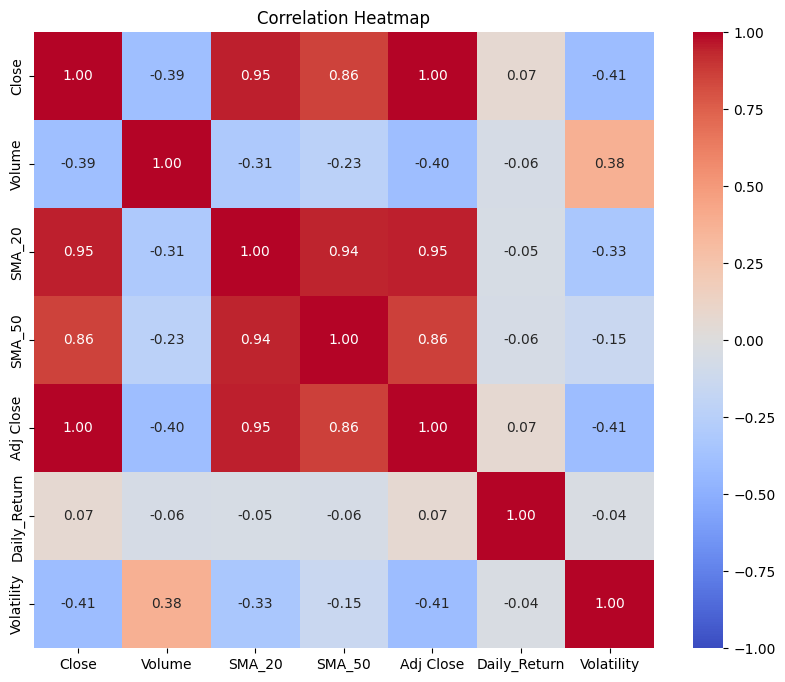

In [35]:
#Correlation Heatmap

data_for_corr = data[['Close', 'Volume', 'SMA_20', 'SMA_50', 'Adj Close', 'Daily_Return', 'Volatility']]

correlation_matrix = data_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()

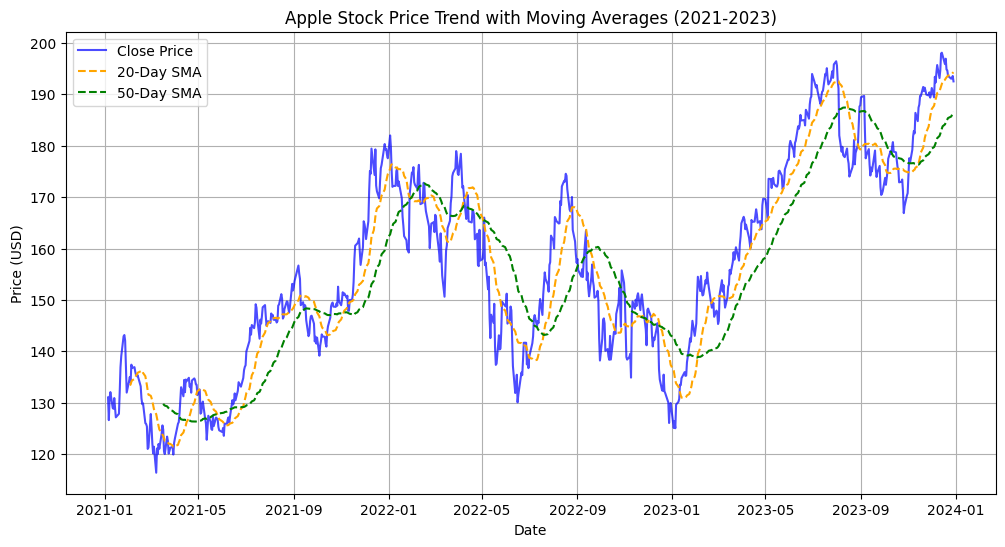

In [36]:
#Stock Price Trend Plot

plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', color='orange', linestyle='--')
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='green', linestyle='--')

plt.title('Apple Stock Price Trend with Moving Averages (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.legend()
plt.grid(True)
plt.show()

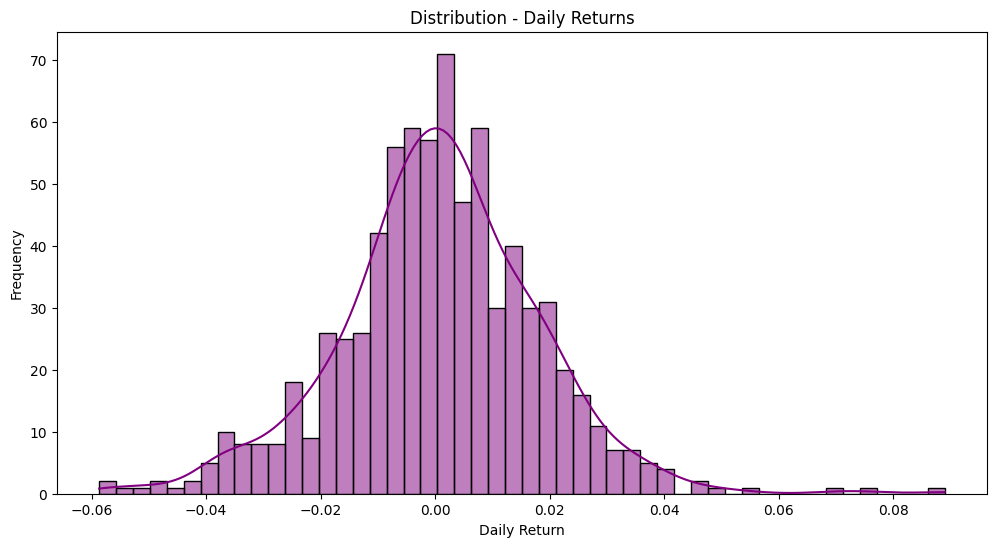

In [38]:
#Histogram for Distribution of Daily Returns

plt.figure(figsize=(12, 6))

sns.histplot(data['Daily_Return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution - Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.show()

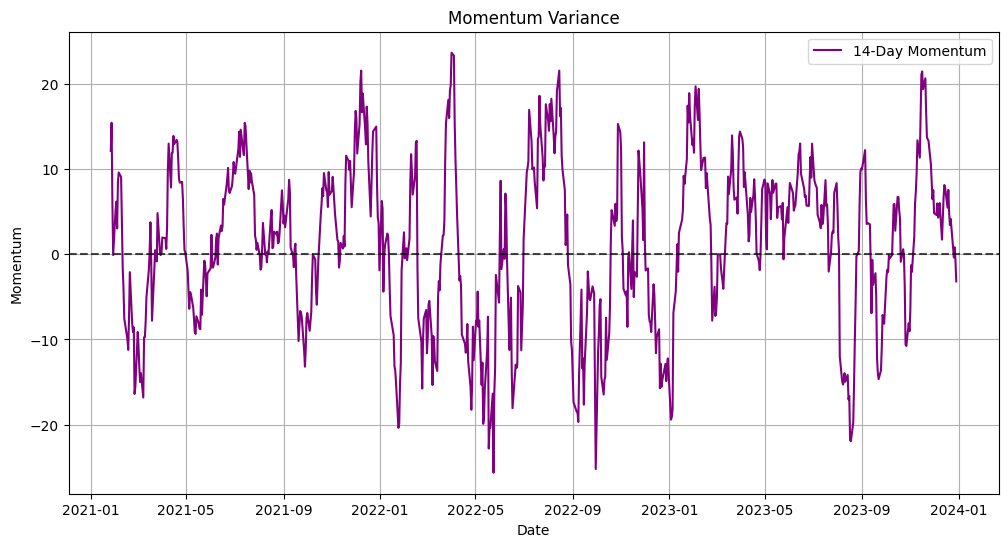

In [39]:
# Momentum

data['Momentum'] = data['Close'] - data['Close'].shift(14)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Momentum'], label=f'14-Day Momentum', color='purple')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)

plt.title('Momentum Variance')
plt.xlabel('Date')
plt.ylabel('Momentum')

plt.legend()
plt.grid(True)
plt.show()

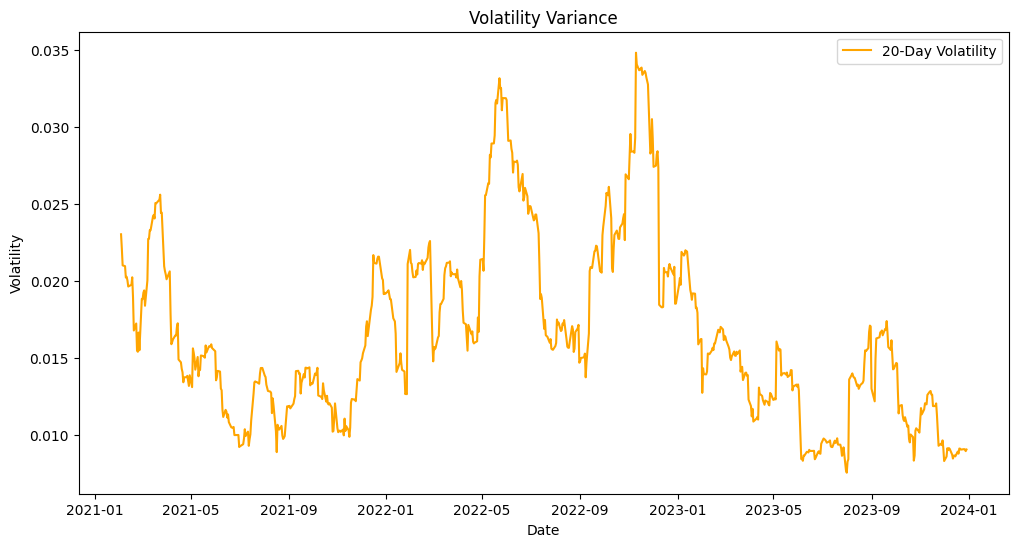

In [40]:
#Volatility

plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['Volatility'], label='20-Day Volatility', color='orange')
plt.title('Volatility Variance')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

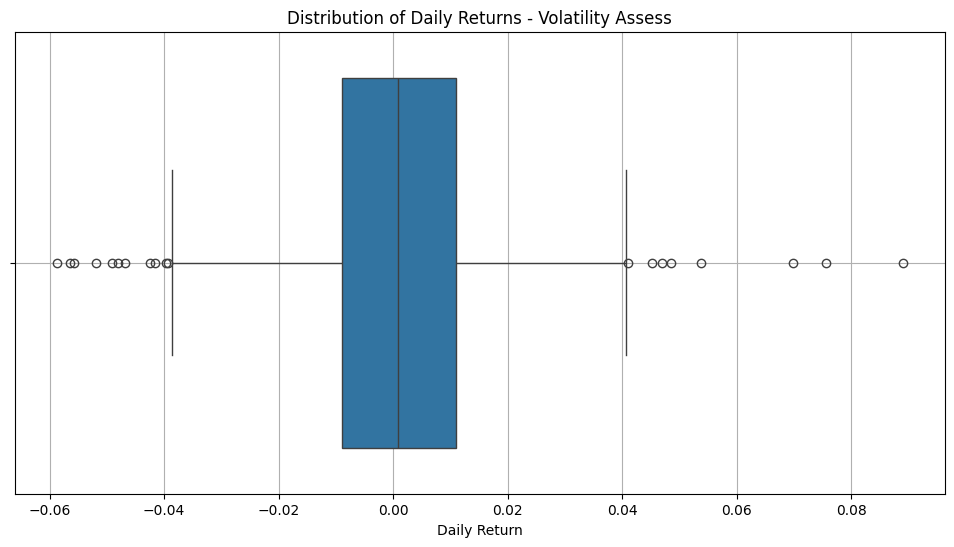

In [42]:
#Daily Return

plt.figure(figsize=(12, 6))

sns.boxplot(x=data['Daily_Return'])
plt.title('Distribution of Daily Returns - Volatility Assess')
plt.xlabel('Daily Return')

plt.grid(True)
plt.show()

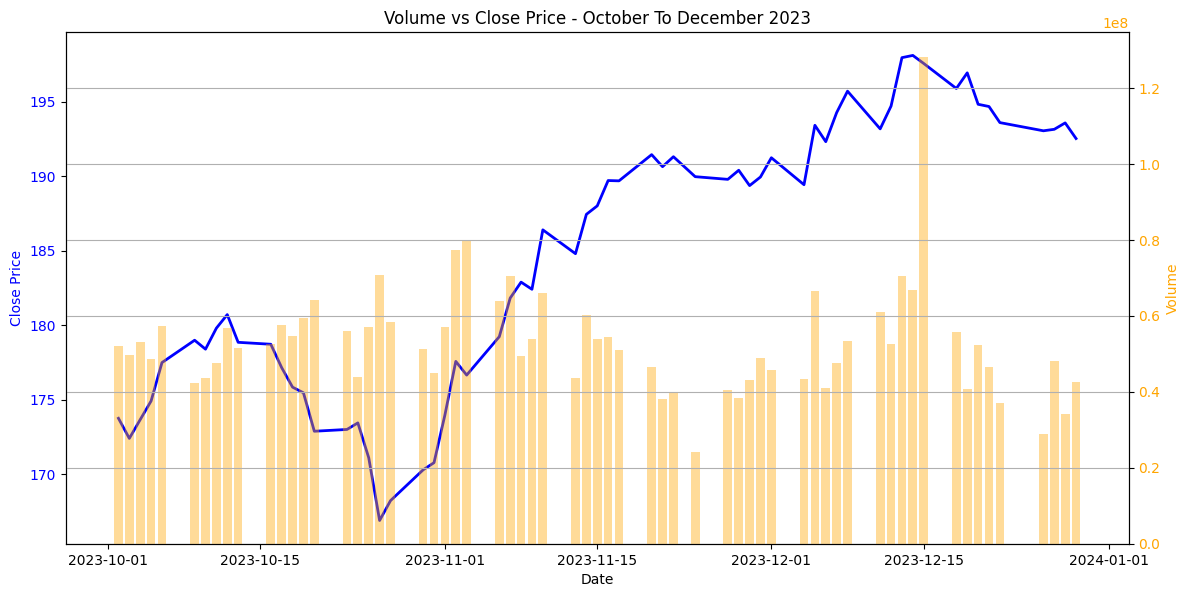

In [50]:
#Volume vs Close Price - October To December 2023

data['Date'] = pd.to_datetime(data['Date'])

data_december = data[(data['Date'] >= '2023-10-01') & (data['Date'] <= '2023-12-31')]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data_december['Date'], data_december['Close'], color='blue', label='Close Price', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(data_december['Date'], data_december['Volume'], color='orange', alpha=0.4, label='Volume')
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Volume vs Close Price - October To December 2023')
plt.grid(True)
plt.show()